# Question 3. 

Q3. Collect the stock price for Tesla (NASDAQ: TSLA) for the past 30 days.  
(a)  Plot the data (date vs. stock price) 

(b)  Implement the stochastic gradient descent algorithm to fit a linear regression model for this 
data set. Use any required open source libraries. Note that this specific algorithm was not 
discussed in the class, but all the key ingredients have been covered. So, you must be able to 
understand how this works.  

(c)  Plot the raw data and your linear regression model together for visual comparison. 

(d)  What does your model predict for Tesla’s stock price for the next three months into the 
future? 

(e)  Explain the pros and cons of gradient descent and stochastic gradient descent.

# Importing Library For Loading and Visualizing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True) 

## The data is collected from Yahoo Finance and contains the data for Oct 2022

<a href="https://finance.yahoo.com/quote/TSLA/history?period1=1664582400&period2=1667174400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true">Click here to download the dataset.</a> 

Note: As there are multiple prices in the dataset such as <b>Open Price</b>, <b>Highest Price</b>, <b>Lowest Price</b> and <b>Closing Price</b> we are selecting <b>Closing Price</b> as the target throughout this program.

In [2]:
df = pd.read_csv('Tesla_StockPrice_Yahoo.csv') #reading stock prices
df.head() #checking out data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
1,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
2,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
3,2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
4,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800


In [3]:
df.info() #Checking Data Types and NUll Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date']) # Converting Date Column to DateTime from String

In [5]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}') 
print(f'Total days={(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2022-10-03 00:00:00 2022-10-28 00:00:00
Total days=25 days


In [6]:
df.describe() # to check for outliers

,Open,High,Low,Close,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,224.023000,229.785502,217.259000,223.624001,223.624001,8.368544e+07
std,14.729518,12.534561,12.618417,11.547728,11.547728,1.554775e+07
min,205.820007,213.500000,198.589996,204.990005,204.990005,6.163880e+07
25%,210.085003,222.662495,208.642498,217.055004,217.055004,6.926190e+07
50%,222.439995,226.625000,216.800003,222.229996,222.229996,8.167280e+07
75%,230.812503,234.000000,222.227505,225.947498,225.947498,9.472035e+07
max,254.500000,257.500000,242.009995,249.440002,249.440002,1.177981e+08


<AxesSubplot: >

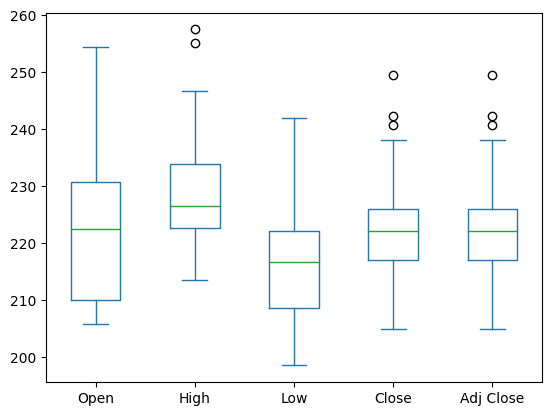

In [7]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box') #box plot to visually check for outliers

## Q3. a) Plot the data: Date VS Stock Price

In [8]:
#plotly figure prepration
#setting a layout for figure. will be used later again. 
layout = go.Layout(
    title='Stock Prices of Tesla for Oct 2022: Date Vs Closing Price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#data to be plot
data_lst = [{'x':df['Date'], 'y':df['Close']}]
fig = go.Figure(data=data_lst, layout=layout)

In [9]:
iplot(fig)

## Q3. b) Implement the stochastic gradient descent algorithm to fit a linear regression model for this data set.

In [10]:
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#spliting data into train and test sets
X = np.array(df.index).reshape(-1,1)
Y = df['Close']

X_train, X_test, Y_train, Y_test = X[:15], X[15:], Y[:15], Y[15:]

### Importing the Stochastic Gradient Descent Linear Regression Model from the scikit-learn library. 

In [12]:
from sklearn.linear_model import SGDRegressor

In [13]:
sgd = SGDRegressor()
sgd.fit(X_train , Y_train) #Fitting the model for the training data

#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, sgd.predict(X_train))}\t{r2_score(Y_test, sgd.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, sgd.predict(X_train))}\t{mse(Y_test, sgd.predict(X_test))}
'''
print("Training and Testing mean squared error and r2_score")
print(scores)

Training and Testing mean squared error and r2_score

Metric           Train                Test        
r2_score  0.5419949135755552	-7.338637793850278
MSE       71.73489729576309	290.2341980865998



## Q3. c) Plot the raw data and your linear regression model together for visual comparison.  

In [14]:
layout = go.Layout(
    title='Stochastic Gradient Descent with Linear Regression: Actual vs Predicted',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X.T[0],
    y = Y,
    mode = 'lines',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X.T[0],
    y = sgd.predict(X).T,
    mode = 'lines',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)

In [15]:
iplot(fig3)

## Q3. d) What does your model predict for Tesla’s stock price for the next three months into the future?  

In [16]:
X_future = np.arange(20,111).reshape(-1,1) # For future 3 months we create a test set X_future.

In [17]:
print("Predicted Stock Price for future 3 months: " ,sgd.predict(X_future))  # making predictions using the above linear model

Predicted Stock Price for future 3 months:  [202.80314761 201.31991549 199.83668336 198.35345123 196.8702191
 195.38698698 193.90375485 192.42052272 190.93729059 189.45405847
 187.97082634 186.48759421 185.00436209 183.52112996 182.03789783
 180.5546657  179.07143358 177.58820145 176.10496932 174.62173719
 173.13850507 171.65527294 170.17204081 168.68880869 167.20557656
 165.72234443 164.2391123  162.75588018 161.27264805 159.78941592
 158.30618379 156.82295167 155.33971954 153.85648741 152.37325528
 150.89002316 149.40679103 147.9235589  146.44032678 144.95709465
 143.47386252 141.99063039 140.50739827 139.02416614 137.54093401
 136.05770188 134.57446976 133.09123763 131.6080055  130.12477338
 128.64154125 127.15830912 125.67507699 124.19184487 122.70861274
 121.22538061 119.74214848 118.25891636 116.77568423 115.2924521
 113.80921998 112.32598785 110.84275572 109.35952359 107.87629147
 106.39305934 104.90982721 103.42659508 101.94336296 100.46013083
  98.9768987   97.49366657  96.010

In [18]:
layout = go.Layout(
    title='Stochastic Gradient Descent with Linear Regression: Future 3 Months Prediction',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


#plotting the future prediction along with current data and predictions

trace0 = go.Scatter(
    x = X.T[0],
    y = Y,
    mode = 'lines',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X.T[0],
    y = sgd.predict(X),
    mode = 'lines',
    name = 'Predicted'
)

trace2 = go.Scatter(
    x = X_future.T[0],
    y = sgd.predict(X_future),
    mode = 'lines',
    name = 'Future 3-Months'
)
data_lst = [trace0,trace1, trace2]
layout.xaxis.title.text = 'Day'
fig4 = go.Figure(data=data_lst, layout=layout)

In [19]:
iplot(fig4)

## Q3. e) Explain the pros and cons of gradient descent and stochastic gradient descent.  

<b>Pros of Gradient descent:</b>
<ul>
<li>It is profoundly steady when contrasted with its Stochastic variant to the extent the union and blunder inclination is concerned.</li>
    
<li>Guaranteed to converge to the global minimum for convex functions.</li>
    
<li>Every one of the updates are made post the event of age, in this manner, it is computationally more productive.</li>
</ul>

<b>Cons of Gradient Descent:</b>
<ul>
    <li>The calculation is inclined to stalling and may end up at a local minimum for non-convex functions.</li>
    <li>The learning takes any longer since no updates are performed until the whole dataset is crossed.</li>
</ul>

<b>Pros of Stochastic Gradient descent:</b>
<ul>
    <li>It is faster than traditional gradient descent. </li>
    <li> Easy to fit in memory as only one data point needs to be processed at a time, thus, computationally less expensive.</li>
</ul>

<b>Cons of Stochastic Gradient descent:</b>
<ul>
    <li> It works on large varience for singular example.</li> 
    <li> The continuous updates can likewise prompt the calculation slanting towards the wrong heading.</li>
</ul>